In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PimaIndians.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
pregnant     392 non-null int64
glucose      392 non-null int64
diastolic    392 non-null int64
triceps      392 non-null int64
insulin      392 non-null int64
bmi          392 non-null float64
diabetes     392 non-null float64
age          392 non-null int64
test         392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 27.6+ KB


In [4]:
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


In [5]:
data.test=[0 if i=="negatif" else 1 for i in data.test ] 

In [6]:
y = data.test.values

In [7]:
x_data=data.drop(["test"],axis=1)
x_data = x_data.values
x_data

array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12) 
print("x train:",x_train.shape)
print("x test:",x_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)

x train: (313, 8)
x test: (79, 8)
y train: (313,)
y test: (79,)


In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Accuracy Score : ",lr.score(x_test,y_test))

Accuracy Score :  0.7341772151898734


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
sample_id = 12
y_test_sample = y_test[sample_id]
x_test_sample = x_test[sample_id,:].reshape(1,-1)

In [13]:
x_test_sample

array([[0.00118203, 0.11938534, 0.05910165, 0.0177305 , 0.04255319,
        0.0286052 , 0.00062175, 0.03073286]])

In [14]:
y_test_sample

0

In [15]:
lr.predict(x_test_sample.reshape(1,-1))

array([0])

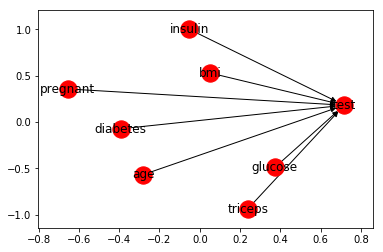

In [16]:
g = nx.DiGraph()
g.add_edges_from([('pregnant', 'test'), ('glucose','test'), ('triceps', 'test'), ('insulin','test'),
                  ('bmi','test'),('diabetes','test'),('age','test')])
nx.draw_networkx(g)

In [17]:
lr.predict_proba(x_test_sample)

array([[0.73438425, 0.26561575]])

In [18]:
lr.coef_ 

array([[0.1157445 , 1.95453958, 0.24779606, 0.32879178, 2.06727883,
        0.22045522, 0.01089113, 0.45716575]])

In [19]:
score=np.dot(lr.coef_,x_test_sample[0])

In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [21]:
sigmoid(score)

array([0.589594])

In [22]:

sigmoid(lr.intercept_ + score)

array([0.26561575])